In [212]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False

from sklearn.cluster import KMeans


In [213]:
df = pd.read_csv('lrfmc_ss.csv')
df

,F,M,C,R,L
0,14.033911,26.760941,1.295531,-0.944931,1.435781
1,9.073143,13.126759,2.868155,-0.911878,1.307222
2,8.718802,12.653379,2.880929,-0.889843,1.328452
3,0.781573,12.540521,1.994699,-0.416082,0.658528
4,9.923560,13.898624,1.344326,-0.922896,0.386076
...,...,...,...,...,...
62038,-0.706657,-0.805293,-0.065896,-0.460152,2.076219
62039,-0.706657,-0.805293,-0.282305,-0.283869,0.557096
62040,-0.706657,-0.772328,-2.689861,-0.735595,-0.149391
62041,-0.706657,-0.779833,-2.554605,1.605667,-1.206172


In [214]:
clf = KMeans( n_clusters=5,
    init='k-means++',
    n_init=10,
    max_iter=300,
    tol=0.0001,
    verbose=0,
    random_state=2021,
    algorithm='auto',)

In [215]:
clf.fit(df)
cluster = clf.cluster_centers_

In [216]:
labels = clf.labels_
df['labels'] = labels

In [217]:
label_map = {0:'客户群1',
            1:'客户群2',
            2:'客户群3',
            3:'客户群4',
            4:'客户群5'}
df['labels'] = df['labels'].map(label_map)

In [218]:
df['labels'].head(3)

0    客户群5
1    客户群5
2    客户群5
Name: labels, dtype: object

(array([ 5337.,     0.,  4249.,     0.,     0., 15730.,     0., 24616.,
            0., 12111.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

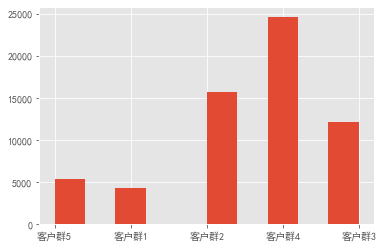

In [219]:
plt.hist(df['labels'])

至此 已经对客户完成分群  接下来需要画出可视化图像 对结果进行更好的展示

In [220]:
label_count =  df['labels'].value_counts()
label_count

客户群4    24616
客户群2    15730
客户群3    12111
客户群5     5337
客户群1     4249
Name: labels, dtype: int64

In [221]:
cluster_center = pd.DataFrame(cluster,
                              columns=['F','M','C','R','L'])

In [222]:
cluster_center

,F,M,C,R,L
0,-0.232308,-0.236575,2.170599,-0.002266,0.041552
1,-0.086623,-0.094539,-0.156905,-0.377509,1.160938
2,-0.573913,-0.536727,-0.175354,1.687012,-0.313081
3,-0.160646,-0.160364,-0.257945,-0.415066,-0.700248
4,2.483112,2.424216,0.309784,-0.799391,0.483595


In [223]:
cluster_center.index = pd.DataFrame(labels).drop_duplicates().iloc[:,0]
cluster_center.index

Int64Index([4, 0, 1, 3, 2], dtype='int64', name=0)

In [224]:
index_map = {0:'客户群1',
            1:'客户群2',
            2:'客户群3',
            3:'客户群4',
            4:'客户群5'}
cluster_center.index = cluster_center.index.map(index_map)

利用聚类结果 画雷达图

In [225]:
labels = ['F', 'M', 'C', 'R', 'L']
lstype = ['-','--',(0, (3,5,1,5,1,5)),':','-.']
kinds = list(cluster_center.iloc[:,0])
legen = cluster_center.index
kinds

[-0.23230809980813105,
 -0.08662305895463289,
 -0.573912562909003,
 -0.1606459015151815,
 2.483111728903623]

In [226]:
cluster_center = pd.concat([cluster_center,cluster_center[['F']]],axis=1)
centers = np.array(cluster_center.iloc[:,0:])
centers

In [228]:
n = len(labels)
angle = np.linspace(0, 2 * np.pi ,n , endpoint=False)
angle = np.concatenate((angle,[angle[0]]))
angle

array([0.        , 1.25663706, 2.51327412, 3.76991118, 5.02654825,
       0.        ])

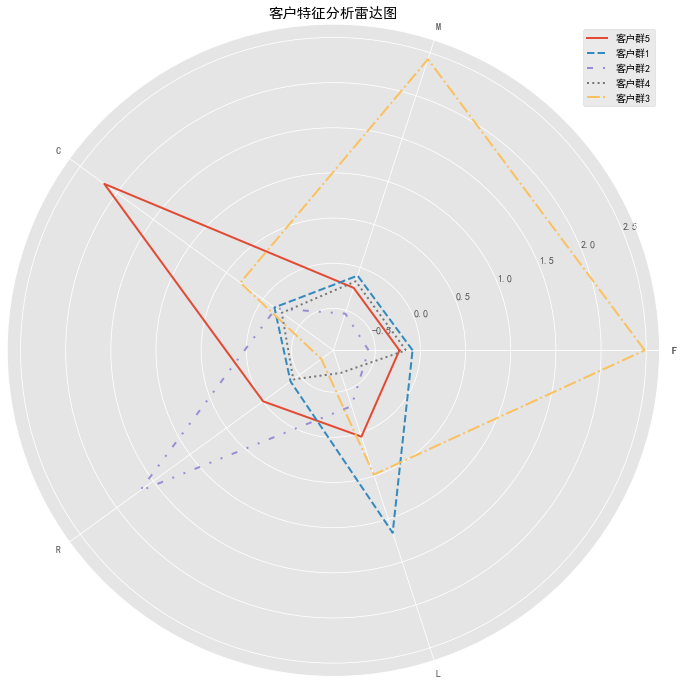

In [237]:
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111,polar=True)
for i in range(len(kinds)):
    ax.plot(angle,centers[i],linestyle=lstype[i],linewidth=2,label=kinds[i])
ax.set_thetagrids(angle * 180 / np.pi,['F', 'M', 'C', 'R', 'L','F'])  # 要闭环 就把开头和结尾设为同一个
plt.title('客户特征分析雷达图')
plt.legend(legen)
plt.show()